# Model Evaluation

This notebook evaluates the performance of the trained model using various metrics and visualizations.

In [1]:
# Import required libraries
import numpy as np
import joblib
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import report
import pandas as pd

sns.set(style="whitegrid")

## Load Processed Data and Trained Model

In [2]:
# Upload data
data_dir = "data/processed"
X_test = joblib.load(f"../{data_dir}/X_test.pkl")  # Disperse Matrix
y_test = np.load(f"../{data_dir}/y_test.npy", allow_pickle=True)

# Load the trained model
model_path = "../models/classifier_model.pkl"
model = joblib.load(model_path)

# Load the TF-IDF vectoriser
vectorizer_path = "../models/tfidf_vectorizer.pkl"
vectorizer = joblib.load(vectorizer_path)

## Model Predictions and Metrics

In [3]:
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.78
F1-Score: 0.77


## Confusion Matrix

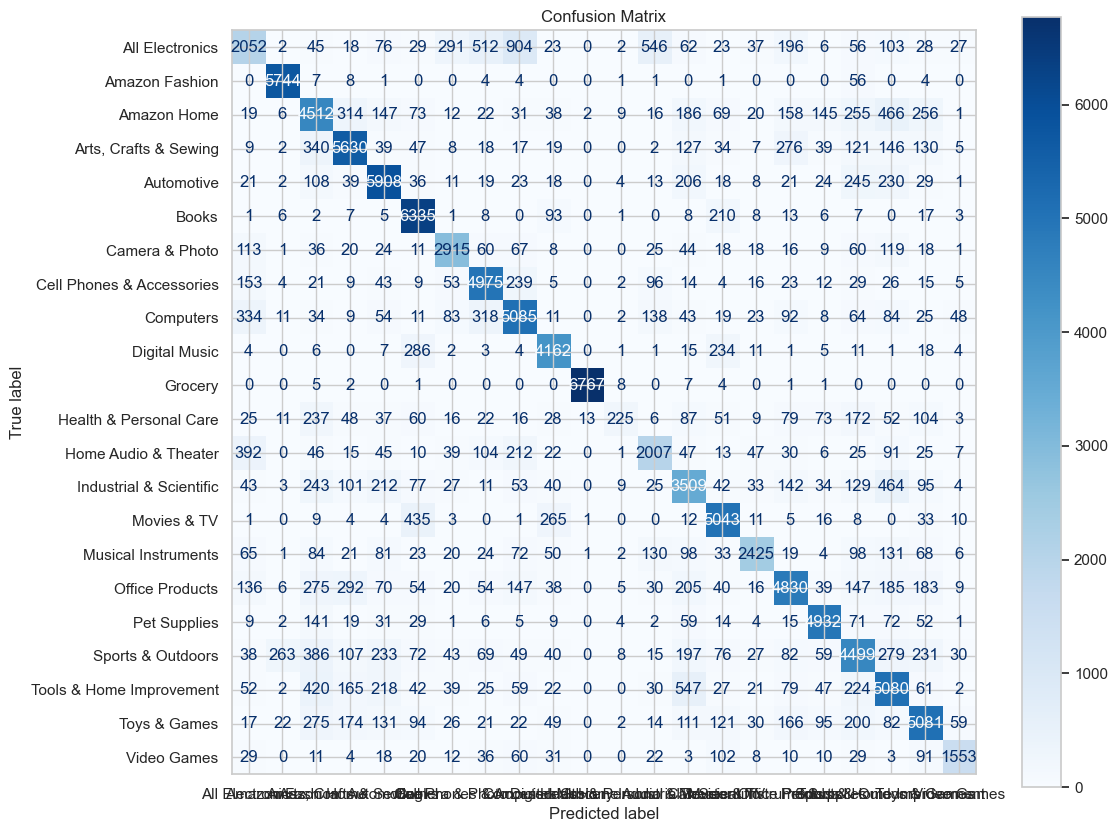

In [4]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(ax=ax, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


## Visualization of Metrics

In [5]:
# Metrics report
report = classification_report(y_test, y_pred, target_names=np.unique(y_test))
print("Classification Report:")
print(report)


Classification Report:
                           precision    recall  f1-score   support

          All Electronics       0.58      0.41      0.48      5038
           Amazon Fashion       0.94      0.99      0.96      5831
              Amazon Home       0.62      0.67      0.64      6757
    Arts, Crafts & Sewing       0.80      0.80      0.80      7016
               Automotive       0.80      0.85      0.82      6984
                    Books       0.82      0.94      0.87      6731
           Camera & Photo       0.80      0.81      0.81      3583
Cell Phones & Accessories       0.79      0.86      0.82      5753
                Computers       0.72      0.78      0.75      6496
            Digital Music       0.84      0.87      0.85      4776
                  Grocery       1.00      1.00      1.00      6796
   Health & Personal Care       0.79      0.16      0.27      1374
     Home Audio & Theater       0.64      0.63      0.64      3184
  Industrial & Scientific       0.63  

## Category Analisys

C:\Users\00jav\AppData\Local\Temp\ipykernel_12880\1243497640.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_analysis = results.groupby("True Label").apply(


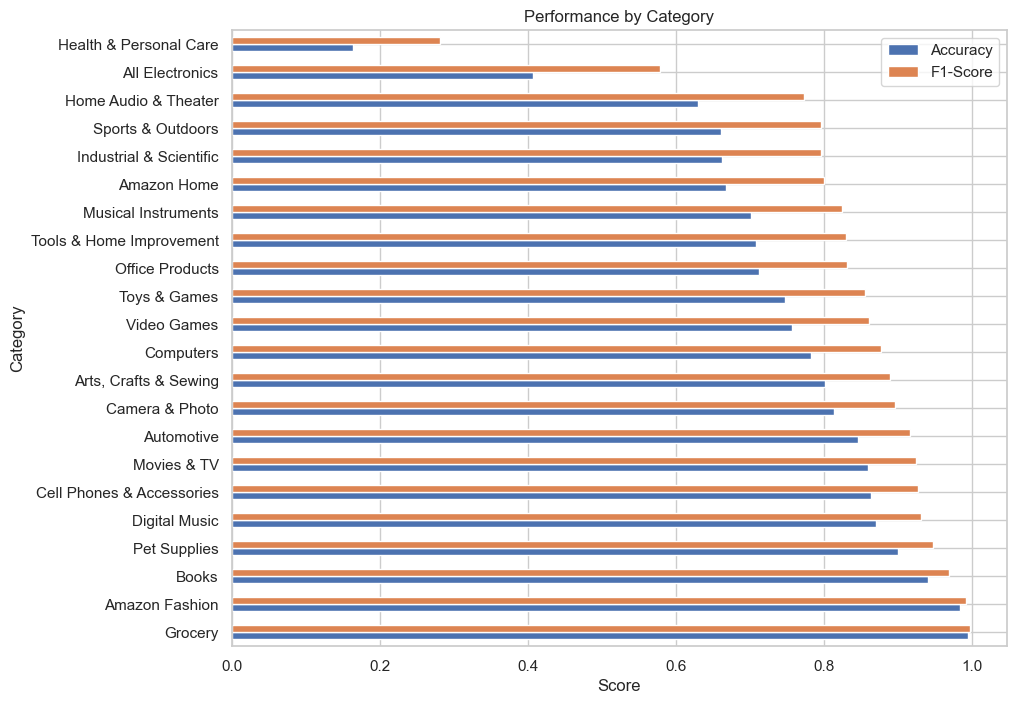

In [6]:
# Create a DataFrame with actual results and predictions
results = pd.DataFrame({
    "True Label": y_test,
    "Predicted Label": y_pred
})

# Summary of metrics by category
category_analysis = results.groupby("True Label").apply(
    lambda group: pd.Series({
        "Accuracy": accuracy_score(group["True Label"], group["Predicted Label"]),
        "F1-Score": f1_score(group["True Label"], group["Predicted Label"], average="weighted")
    })
)

# Visualization of performance by category
category_analysis.sort_values("Accuracy", ascending=False).plot.barh(figsize=(10, 8))
plt.title("Performance by Category")
plt.xlabel("Score")
plt.ylabel("Category")
plt.show()



### Errors

In [7]:
# Identify incorrect predictions
incorrect_preds = results[results["True Label"] != results["Predicted Label"]]
total_preds = len(results)
incorrect_percentage = (len(incorrect_preds) / total_preds) * 100

print(f"Percentage of Incorrect Predictions: {incorrect_percentage:.2f}%")

Percentage of Incorrect Predictions: 22.28%
